In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

data = pd.read_csv("data/cleaned_no_tmp.csv")
df = pd.DataFrame(data=data)
df.head()

,Unnamed: 0,AB,AF,AU,BP,C1,CA,CR,DA,DE,...,VL,WC,Z9,c_fname,c_lname,citedby,count,gender,probability,scholar_id
0,0,The El Nino/Southern Oscillation (ENSO) system...,"Watanabe, Tsuyoshi; Suzuki, Atsushi; Minobe, S...","Watanabe, T; Suzuki, A; Minobe, S; Kawashima, ...",209,"[Watanabe, Tsuyoshi; Minobe, Shoshiro; Kawashi...",NaN,NaN,11/20/17,NaN,...,471,Multidisciplinary Sciences,62,tomoki,kase,1578,4,male,1,hWANX-AAAAAJ
1,1,Humans differ from other animals in many aspec...,"McLean, Cory Y.; Reno, Philip L.; Pollen, Alex...","McLean, CY; Reno, PL; Pollen, AA; Bassan, AI; ...",216,"[McLean, Cory Y.; Wenger, Aaron M.; Bejerano, ...",NaN,NaN,11/20/17,NaN,...,471,Multidisciplinary Sciences,184,david m.,kingsley,na,1,male,1,na
2,2,Under physiological conditions the gut-associa...,"DePaolo, R. W.; Abadie, V.; Tang, F.; Fehlner-...","DePaolo, RW; Abadie, V; Tang, F; Fehlner-Peach...",220,"[DePaolo, R. W.; Abadie, V.; Tang, F.; Fehlner...",NaN,NaN,11/20/17,NaN,...,471,Multidisciplinary Sciences,201,b.,jabri,na,na,na,na,na
3,3,The ability to generate patient-specific human...,"Itzhaki, Ilanit; Maizels, Leonid; Huber, Irit;...","Itzhaki, I; Maizels, L; Huber, I; Zwi-Dantsis,...",225,"[Itzhaki, Ilanit; Maizels, Leonid; Huber, Irit...",NaN,NaN,11/20/17,NaN,...,471,Multidisciplinary Sciences,477,lior,gepstein,na,85,male,0.61,na
4,4,Individuals with congenital or acquired prolon...,"Yazawa, Masayuki; Hsueh, Brian; Jia, Xiaolin; ...","Yazawa, M; Hsueh, B; Jia, XL; Pasca, AM; Berns...",230,"[Yazawa, Masayuki; Hsueh, Brian; Jia, Xiaolin;...",NaN,NaN,11/20/17,NaN,...,471,Multidisciplinary Sciences,322,ricardo e.,dolmetsch,na,na,na,na,na


In [77]:
# The total number of women researchers in the data set
all_women = df[df["gender"] == "female"].copy()
len(all_women)

496

In [78]:
# The total number of men researchers in the data set
all_men = df[df["gender"] == "male"].copy()
len(all_men)

2347

In [3]:
# Number of researchers with a valid google scholar ID
df = df.loc[~(df["scholar_id"] == "na")]
len(df)

1388

In [80]:
# Number of women researchers that fit all conditions of experiment
women = df[df["gender"] == "female"].copy()
len(women)

153

In [4]:
# Number of men researchers that fit all conditions of experiment
men = df[df["gender"] == "male"].copy()
len(men)

1233

In [9]:

# Changing every value to be an int
def cited_to_num(x):
    try:
        x["citedby"] = float(x["citedby"])
    except:
        x["citedby"] = -1
    return x;


In [ ]:
women = women.apply(cited_to_num, axis=1)
women.head()

In [83]:
w_plot = women.loc[~(women["citedby"] == -1)]
w_plot = w_plot["citedby"]

print "Max:", w_plot.max(), "| Min:", w_plot.min()

Max: 110198.0 | Min: 1.0


In [84]:
print "Median:", w_plot.median(), "| Mean:", w_plot.mean()

Median: 6063.0 | Mean: 13295.503268


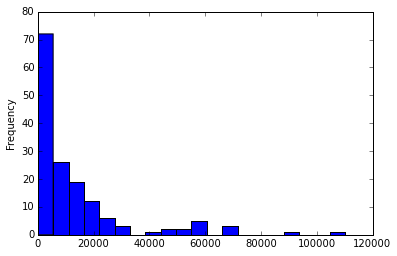

In [85]:
w_plot.plot.hist(bins=20)

In [86]:
w_plot.quantile([.2, .4, .6, .8])

0.2     1473.4
0.4     4125.8
0.6     9344.6
0.8    17928.6
Name: citedby, dtype: float64

In [87]:
type(women)

pandas.core.frame.DataFrame

In [5]:
# q1 = [0, 1473]
# q2 = [1474, 4126]
# q3 = [4127, 9345]
# q4 = [9346, 17929]
# q5 = [17930, ]

def set_quantile(df):
    
    x = df["citedby"]
    
    if ((x <= 1474) & (x >= 0)):
        df["quantile"] = 1
        df["range"] = "[0, 1474]"
    
    elif ((x > 1474) & (x <= 4126)):
        df["quantile"] = 2
        df["range"] = "(1474, 4126]"
    
    elif ((x > 4126) & (x <= 9345)):
        df["quantile"] = 3
        df["range"] = "(4126, 9345]"
    
    elif ((x > 9345) & (x <= 17929)):
        df["quantile"] = 4
        df["range"] = "(9345, 17929]"
    
    elif ((x > 17929) & (x <= 110198)):
        df["quantile"] = 5
        df["range"] = "(17929, ]"
    
    else:
        df["quantile"] = -1
        df["range"] = "out of range"
    
    return df;




In [ ]:
women = women.apply(set_quantile, axis=1)
women.head()

In [89]:
print len(women[(women["quantile"] == -1)]), len(women[(women["quantile"] == 1)]), len(women[(women["quantile"] == 2)]), len(women[(women["quantile"] == 3)]), len(women[(women["quantile"] == 4)]), len(women[(women["quantile"] == 5)])

0 31 30 31 30 31


In [11]:
men = men.apply(cited_to_num, axis=1)
men = men.apply(set_quantile, axis=1)
#men = men.drop("Unnamed: 0", axis =1)
men.to_csv("data/all_men_quantile.csv")


In [12]:
men.tail()

,AB,AF,AU,BP,C1,CA,CR,DA,DE,DI,...,Z9,c_fname,c_lname,citedby,count,gender,probability,scholar_id,quantile,range
6470,Rare copy number variants (CNVs) have a promin...,"Vacic, Vladimir; McCarthy, Shane; Malhotra, Dh...","Vacic, V; McCarthy, S; Malhotra, D; Murray, F;...",499,"[Vacic, Vladimir; McCarthy, Shane; Malhotra, D...",NaN,NaN,11/20/17,NaN,10.1038/nature09884,...,189,jonathan,sebat,21553.0,3702,male,1,xaD2l-0AAAAJ,5,"(17929, ]"
6478,Ultracold atoms in optical lattices provide a ...,"Weitenberg, Christof; Endres, Manuel; Sherson,...","Weitenberg, C; Endres, M; Sherson, JF; Cheneau...",319,"[Weitenberg, Christof; Endres, Manuel; Sherson...",NaN,NaN,11/20/17,NaN,10.1038/nature09827,...,362,stefan,kuhr,6252.0,917,male,1,e8S4uP8AAAAJ,3,"(4126, 9345]"
6486,Anxiety-a sustained state of heightened appreh...,"Tye, Kay M.; Prakash, Rohit; Kim, Sung-Yon; Fe...","Tye, KM; Prakash, R; Kim, SY; Fenno, LE; Grose...",358,"[Tye, Kay M.; Prakash, Rohit; Kim, Sung-Yon; F...",NaN,NaN,11/20/17,NaN,10.1038/nature09820,...,427,karl,deisseroth,55980.0,700,male,1,WhhC4LwAAAAJ,5,"(17929, ]"
6496,The proper connectivity between neurons is ess...,"Briggman, Kevin L.; Helmstaedter, Moritz; Denk...","Briggman, KL; Helmstaedter, M; Denk, W",183,"[Briggman, Kevin L.; Helmstaedter, Moritz; Den...",NaN,NaN,11/20/17,NaN,10.1038/nature09818,...,347,winfried,denk,35421.0,6,male,1,pFOcaHAAAAAJ,5,"(17929, ]"
6497,B-cell non-Hodgkin's lymphoma comprises biolog...,"Pasqualucci, Laura; Dominguez-Sola, David; Chi...","Pasqualucci, L; Dominguez-Sola, D; Chiarenza, ...",189,"[Pasqualucci, Laura; Dominguez-Sola, David; Ch...",NaN,NaN,11/20/17,NaN,10.1038/nature09730,...,389,riccardo,dalla-favera,54790.0,288,male,1,m0M1n24AAAAJ,5,"(17929, ]"


In [91]:
q1 = []
q2 = []
q3 = []
q4 = []
q5 = []
other = []

def sort_quantile(x):
    
    y = x["quantile"]
    
    if (y ==1):
        q1.append(x)
    elif (y == 2):
        q2.append(x)
    elif (y == 3):
        q3.append(x)
    elif (y == 4):
        q4.append(x)
    elif (y == 5):
        q5.append(x)
    else:
        other.append(x)
    
    return x;

q_men = men.apply(sort_quantile, axis=1)
        

,Unnamed: 0,AB,AF,AU,BP,C1,CA,CR,DA,DE,...,Z9,c_fname,c_lname,citedby,count,gender,probability,scholar_id,quantile,range
0,0,The El Nino/Southern Oscillation (ENSO) system...,"Watanabe, Tsuyoshi; Suzuki, Atsushi; Minobe, S...","Watanabe, T; Suzuki, A; Minobe, S; Kawashima, ...",209,"[Watanabe, Tsuyoshi; Minobe, Shoshiro; Kawashi...",NaN,NaN,11/20/17,NaN,...,62,tomoki,kase,1578.0,4,male,1,hWANX-AAAAAJ,2,"(1474, 4126]"
8,8,"During gene transcription, RNA polymerase (Pol...","Cheung, Alan C. M.; Cramer, Patrick","Cheung, ACM; Cramer, P",249,"[Cheung, Alan C. M.; Cramer, Patrick] Univ Mun...",NaN,NaN,11/20/17,NaN,...,142,patrick,cramer,14443.0,2877,male,1,NKjlhVQAAAAJ,4,"(9345, 17929]"
12,12,The Milankovitch theory states that global cli...,"Laepple, Thomas; Werner, Martin; Lohmann, Gerrit","Laepple, T; Werner, M; Lohmann, G",91,"[Laepple, Thomas; Werner, Martin; Lohmann, Ger...",NaN,NaN,11/20/17,NaN,...,35,gerrit,lohmann,7031.0,58,male,1,5OTpDIoAAAAJ,3,"(4126, 9345]"
18,18,"Annelida, the ringed worms, is a highly divers...","Struck, Torsten H.; Paul, Christiane; Hill, Na...","Struck, TH; Paul, C; Hill, N; Hartmann, S; Hos...",95,"[Struck, Torsten H.; Hoesel, Christoph; Pursch...",NaN,NaN,11/20/17,NaN,...,208,christoph,bleidorn,2395.0,192,male,1,MJ7LVDsAAAAJ,2,"(1474, 4126]"
24,24,Volcanic tremor is a ubiquitous feature of exp...,"Jellinek, A. Mark; Bercovici, David","Jellinek, AM; Bercovici, D",522,"[Jellinek, A. Mark] Univ British Columbia, Dep...",NaN,NaN,11/20/17,NaN,...,37,david,bercovici,5124.0,12593,male,1,P9EAB4YAAAAJ,3,"(4126, 9345]"
26,26,The control of quantum systems is of fundament...,"Barreiro, Julio T.; Mueller, Markus; Schindler...","Barreiro, JT; Muller, M; Schindler, P; Nigg, D...",486,"[Mueller, Markus; Chwalla, Michael; Roos, Chri...",NaN,NaN,11/20/17,NaN,...,383,rainer,blatt,25530.0,84,male,0.99,_34V-4QAAAAJ,5,"(17929, ]"
33,33,The cellular basis of depressive disorders is ...,"Li, Bo; Piriz, Joaquin; Mirrione, Martine; Chu...","Li, B; Piriz, J; Mirrione, M; Chung, CH; Proul...",535,"[Li, Bo; Piriz, Joaquin; Chung, ChiHye; Proulx...",NaN,NaN,11/20/17,NaN,...,196,roberto,malinow,29560.0,1956,male,1,fyEA24EAAAAJ,5,"(17929, ]"
36,36,Inflammatory mechanisms influence tumorigenesi...,"Tan, Wei; Zhang, Weizhou; Strasner, Amy; Grive...","Tan, W; Zhang, WZ; Strasner, A; Grivennikov, S...",548,"[Tan, Wei; Zhang, Weizhou; Strasner, Amy; Griv...",NaN,NaN,11/20/17,NaN,...,285,michael,karin,227911.0,11094,male,1,xVvyb1gAAAAJ,-1,out of range
40,40,Daily oscillations of gene expression underlie...,"Lim, Chunghun; Lee, Jongbin; Choi, Changtaek; ...","Lim, C; Lee, J; Choi, C; Kilman, VL; Kim, J; P...",399,"[Lim, Chunghun; Kilman, Valerie L.; Allada, Ra...",NaN,NaN,11/20/17,NaN,...,37,joonho,choe,510.0,2,male,1,Y8Rk7YMAAAAJ,1,"[0, 1474]"
44,44,Determining the three-dimensional (3D) arrange...,"Van Aert, Sandra; Batenburg, Kees J.; Rossell,...","Van Aert, S; Batenburg, KJ; Rossell, MD; Erni,...",374,"[Van Aert, Sandra; Van Tendeloo, Gustaaf] Univ...",NaN,NaN,11/20/17,NaN,...,244,gustaaf,van tendeloo,38834.0,2,male,1,k6aFPtEAAAAJ,5,"(17929, ]"


In [107]:
men.shape

(1233, 59)

In [114]:
for i in range(0, 10): 
    q1_r = q1.sample(31)
    q2_r = q2.sample(30)
    q3_r = q3.sample(31)
    q4_r = q4.sample(30)
    q5_r = q5.sample(31)
    random_men = pd.concat([q1_r, q2_r, q3_r, q4_r, q5_r])
    random_men.to_csv("data/random_men/random_" + str(i) + ".csv")
    print len(random_men)
    
    
#len(random_men)

153
153
153
153
153
153
153
153
153
153


In [115]:
import numpy as np

q1 = pd.DataFrame(np.array(q1).reshape(-1, 59), columns=q1[0].axes)
q2 = pd.DataFrame(np.array(q2).reshape(-1, 59), columns=q2[0].axes)
q3 = pd.DataFrame(np.array(q3).reshape(-1, 59), columns=q3[0].axes)
q4 = pd.DataFrame(np.array(q4).reshape(-1, 59), columns=q4[0].axes)
q5 = pd.DataFrame(np.array(q5).reshape(-1, 59), columns=q5[0].axes)

print len(q1), len(q2), len(q3), len(q4), len(q5)

KeyError: 0

In [111]:
random_men

,Unnamed: 0,AB,AF,AU,BP,C1,CA,CR,DA,DE,...,Z9,c_fname,c_lname,citedby,count,gender,probability,scholar_id,quantile,range
48,452,Major ice sheets were permanently established ...,"Edgar, Kirsty M.; Wilson, Paul A.; Sexton, Phi...","Edgar, KM; Wilson, PA; Sexton, PF; Suganuma, Y",908,"Natl Oceanog Ctr, Sch Ocean & Earth Sci, South...",NaN,NaN,11/20/17,NaN,...,52,yusuke,suganuma,563,28,male,1,Jaf7rrYAAAAJ,1,"[0, 1474]"
101,366,More than half of mammalian genes generate mul...,"Bava, Felice-Alessio; Eliscovich, Carolina; Fe...","Bava, FA; Eliscovich, C; Ferreira, PG; Minana,...",121,"[Bava, Felice-Alessio; Mendez, Raul] Inst Res ...",NaN,NaN,11/20/17,NaN,...,56,raul,mendez,1421,821,male,1,Brl2udAAAAAJ,1,"[0, 1474]"
56,107,Classical sexual selection theory(1-4) provide...,"Dale, James; Dey, Cody J.; Delhey, Kaspar; Kem...","Dale, J; Dey, CJ; Delhey, K; Kempenaers, B; Va...",367,"[Dale, James] Massey Univ, Inst Nat & Math Sci...",NaN,NaN,11/19/17,NaN,...,40,mihai,valcu,1096,89,male,0.98,ltgB1HkAAAAJ,1,"[0, 1474]"
14,318,Integrase is an essential retroviral enzyme th...,"Hare, Stephen; Gupta, Saumya Shree; Valkov, Eu...","Hare, S; Gupta, SS; Valkov, E; Engelman, A; Ch...",232,"[Hare, Stephen; Gupta, Saumya Shree; Valkov, E...",NaN,NaN,11/20/17,NaN,...,394,peter,cherepanov,8,4373,male,1,6rCD_4AAAAAJ,1,"[0, 1474]"
47,352,"Greek speakers say ""ovpa"", Germans ""schwanz'' ...","Pagel, Mark; Atkinson, Quentin D.; Meade, Andrew","Pagel, M; Atkinson, QD; Meade, A",717,"Univ Reading, Sch Biol Sci, Reading RG6 6AS, B...",NaN,NaN,11/20/17,NaN,...,161,andrew,meade,139,5168,male,1,7LWApVAAAAAJ,1,"[0, 1474]"
5,65,Eukaryotic cells express a wide variety of end...,"Guang, Shouhong; Bochner, Aaron F.; Burkhart, ...","Guang, SH; Bochner, AF; Burkhart, KB; Burton, ...",1097,"[Guang, Shouhong; Bochner, Aaron F.; Burkhart,...",NaN,NaN,11/20/17,NaN,...,142,scott,kennedy,1076,3450,male,1,egsYZ94AAAAJ,1,"[0, 1474]"
54,62,The formation of relativistic jets by an accre...,"Liu, Ji-Feng; Bai, Yu; Wang, Song; Justham, St...","Liu, JF; Bai, Y; Wang, S; Justham, S; Lu, YJ; ...",108,"[Liu, Ji-Feng; Bai, Yu; Wang, Song; Justham, S...",NaN,NaN,11/19/17,NaN,...,12,shri,kulkarni,212,5,male,1,7t60suYAAAAJ,1,"[0, 1474]"
104,437,Tropical peatlands contain one of the largest ...,"Moore, Sam; Evans, Chris D.; Page, Susan E.; G...","Moore, S; Evans, CD; Page, SE; Garnett, MH; Jo...",660,"[Moore, Sam; Gauci, Vincent] Open Univ, Dept E...",NaN,NaN,11/20/17,NaN,...,86,vincent,gauci,1015,1424,male,1,TzXcdTIAAAAJ,1,"[0, 1474]"
53,1,Ancient DNA makes it possible to observe natur...,"Mathieson, Iain; Lazaridis, Iosif; Rohland, Na...","Mathieson, I; Lazaridis, I; Rohland, N; Mallic...",499,"[Mathieson, Iain; Lazaridis, Iosif; Rohland, N...",NaN,NaN,11/19/17,NaN,...,137,david,reich,14,12593,male,1,rK-2mFQAAAAJ,1,"[0, 1474]"
70,27,The United States is now experiencing the most...,"Edwards, Peter M.; Brown, Steven S.; Roberts, ...","Edwards, PM; Brown, SS; Roberts, JM; Ahmadov, ...",351,"[Edwards, Peter M.; Brown, Steven S.; Roberts,...",NaN,NaN,11/20/17,NaN,...,60,robert,zamora,21,5222,male,1,plyicQYAAAAJ,1,"[0, 1474]"


In [ ]:
'''

categories = pd.qcut(f["citedby"], 3, labels=["1_3", "2_3", "3_3"])
f["categories"] = pd.qcut(f["citedby"], 3, labels=["1_3", "2_3", "3_3"])
#categories
retbins = pd.qcut(f["citedby"], 3, labels=["1_3", "2_3", "3_3"], retbins=True)
retbins

'''

In [112]:
random_men.to_csv("data/random_men_quantile.csv")
women.to_csv("data/women_quantile.csv")

In [116]:
print len(q1), len(q2), len(q3), len(q4), len(q5)

136 159 242 229 440


In [ ]:
'''
import numpy as np

bins = np.linspace(f.citedby.min(), f.citedby.max(), 5)
groups = f.groupby(np.digitize(f.citedby, bins))
groups.mean()
'''